In [1]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch

### Competitions  
From this table we will be able to see the id of the competition

In [2]:
sb.competitions().head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [3]:
sb.matches(competition_id=43, season_id=106).head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,...,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2


#### Match id for Argentia Vs France 2022 world cup final

In [4]:
MATCH_ID = 3869685

### Importing datasets through statsbomb api

In [5]:
## This dataset consists of data related to all the events of a matches
match_event_df = sb.events(match_id=MATCH_ID)

In [6]:
## this dataset consists of a data of the camera, which has data, visibale area and the objects in the freeze_frame
match_360_df = pd.read_json(f'/Users/asheshlalshrestha/Desktop/Datanal/Project/Football Data/open-data-master/data/three-sixty/{MATCH_ID}.json')

In [7]:
match_360_df

,event_uuid,visible_area,freeze_frame
0,f651a6c4-55e3-4e0f-a178-59414ba83d6a,"[8.98496759714251, 80.0, 41.4622037211361, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
1,97b5dc82-547a-4f93-a632-a2a8daf5ac98,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
2,9707e590-1d55-4d25-a50f-475019356152,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
3,a5956ecc-d637-44d2-8705-e2079e12013e,"[10.227276315524, 80.0, 41.5155332886657, 0.0,...","[{'teammate': True, 'actor': False, 'keeper': ..."
4,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,"[13.2232254880239, 80.0, 0.0, 65.4802459369524...","[{'teammate': True, 'actor': False, 'keeper': ..."
...,...,...,...
3678,97439112-dfb5-4bd5-9967-554095296096,"[74.8245066203564, 80.0, 65.5827051836776, 11....","[{'teammate': True, 'actor': True, 'keeper': F..."
3679,50dcde1a-faa3-4eec-a0cd-3f09a7cf763a,"[71.7859219296227, 80.0, 72.1109742638867, 8.9...","[{'teammate': True, 'actor': True, 'keeper': F..."
3680,54e27ba9-b9ae-44a3-ac8d-fc91e76a1b91,"[6.10280272391214, 80.0, 37.1010455294984, 7.9...","[{'teammate': True, 'actor': True, 'keeper': F..."
3681,bcc6d4ae-f71c-4566-bf2d-c12f910eb526,"[6.0830318986702, 80.0, 35.2414826693926, 9.61...","[{'teammate': True, 'actor': True, 'keeper': F..."


In [8]:
match_event_df.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,771,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN


### Merging two datasets on the basis of the event_uuid

In [9]:
df = pd.merge(left=match_event_df,right = match_360_df,
              left_on='id',right_on='event_uuid',how='left')

In [10]:
df.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,771,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:00:00.000,Half Start,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:00:00.000,Half Start,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:00:00.000,Half Start,NaN,NaN,NaN,NaN


In [11]:
df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

### Messi pass analysis

In [12]:
## Messi player id is 5503
MESSI = 5503

## filtering the dataset with MESSI as player and type as Pass
df1 = df[(df['player_id']==MESSI) & (df['type']=='Pass')].reset_index(drop=True)
df1.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:02:16.985,Pass,True,1552304a-f3c0-42bf-b7ff-d7b0173d7488,"[85.5040380313735, 77.9451748902892, 58.862742...","[{'teammate': False, 'actor': False, 'keeper':..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:02:27.185,Pass,NaN,f9405131-3f16-47bc-ab94-082f20057f60,"[98.8387085779202, 79.2108986084354, 74.322964...","[{'teammate': True, 'actor': False, 'keeper': ..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:03:52.966,Pass,NaN,dcc37e05-d4f7-46ee-8697-9d0376ccccc0,"[53.4407029120278, 78.4795871059066, 38.950153...","[{'teammate': True, 'actor': False, 'keeper': ..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:04:26.443,Pass,NaN,4af1c94c-9d4f-4f52-a365-1a1f6cf609cd,"[90.6577131581134, 80.0, 61.1733802546724, 80....","[{'teammate': True, 'actor': False, 'keeper': ..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:07:11.325,Pass,NaN,4e969f98-9588-487e-ba88-3d797c6e2fa7,"[73.4864363052754, 0.0, 63.9023629764572, 80.0...","[{'teammate': True, 'actor': False, 'keeper': ..."


In [13]:
df1.location.head()

0    [76.6, 35.7]
1    [99.3, 57.3]
2    [67.9, 59.0]
3    [81.8, 65.2]
4    [39.2, 48.1]
Name: location, dtype: object

In [14]:
## start location of the passes
df1[['x_start','y_start']] = pd.DataFrame(df1.location.tolist(),index=df1.index)
df1.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,team,team_id,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame,x_start,y_start
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:02:16.985,Pass,True,1552304a-f3c0-42bf-b7ff-d7b0173d7488,"[85.5040380313735, 77.9451748902892, 58.862742...","[{'teammate': False, 'actor': False, 'keeper':...",76.6,35.7
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:02:27.185,Pass,NaN,f9405131-3f16-47bc-ab94-082f20057f60,"[98.8387085779202, 79.2108986084354, 74.322964...","[{'teammate': True, 'actor': False, 'keeper': ...",99.3,57.3
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:03:52.966,Pass,NaN,dcc37e05-d4f7-46ee-8697-9d0376ccccc0,"[53.4407029120278, 78.4795871059066, 38.950153...","[{'teammate': True, 'actor': False, 'keeper': ...",67.9,59.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:04:26.443,Pass,NaN,4af1c94c-9d4f-4f52-a365-1a1f6cf609cd,"[90.6577131581134, 80.0, 61.1733802546724, 80....","[{'teammate': True, 'actor': False, 'keeper': ...",81.8,65.2
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:07:11.325,Pass,NaN,4e969f98-9588-487e-ba88-3d797c6e2fa7,"[73.4864363052754, 0.0, 63.9023629764572, 80.0...","[{'teammate': True, 'actor': False, 'keeper': ...",39.2,48.1


In [15]:
df1['pass_end_location'].head()

0    [116.2, 8.9]
1    [96.7, 49.8]
2    [49.0, 60.3]
3    [70.2, 67.7]
4    [65.3, 35.4]
Name: pass_end_location, dtype: object

In [16]:
df1[['x_end','y_end']] = pd.DataFrame(df1.pass_end_location.tolist(),index=df1.index)

In [17]:
df1.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame,x_start,y_start,x_end,y_end
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:02:16.985,Pass,True,1552304a-f3c0-42bf-b7ff-d7b0173d7488,"[85.5040380313735, 77.9451748902892, 58.862742...","[{'teammate': False, 'actor': False, 'keeper':...",76.6,35.7,116.2,8.9
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:02:27.185,Pass,NaN,f9405131-3f16-47bc-ab94-082f20057f60,"[98.8387085779202, 79.2108986084354, 74.322964...","[{'teammate': True, 'actor': False, 'keeper': ...",99.3,57.3,96.7,49.8
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:03:52.966,Pass,NaN,dcc37e05-d4f7-46ee-8697-9d0376ccccc0,"[53.4407029120278, 78.4795871059066, 38.950153...","[{'teammate': True, 'actor': False, 'keeper': ...",67.9,59.0,49.0,60.3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:04:26.443,Pass,NaN,4af1c94c-9d4f-4f52-a365-1a1f6cf609cd,"[90.6577131581134, 80.0, 61.1733802546724, 80....","[{'teammate': True, 'actor': False, 'keeper': ...",81.8,65.2,70.2,67.7
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:07:11.325,Pass,NaN,4e969f98-9588-487e-ba88-3d797c6e2fa7,"[73.4864363052754, 0.0, 63.9023629764572, 80.0...","[{'teammate': True, 'actor': False, 'keeper': ...",39.2,48.1,65.3,35.4


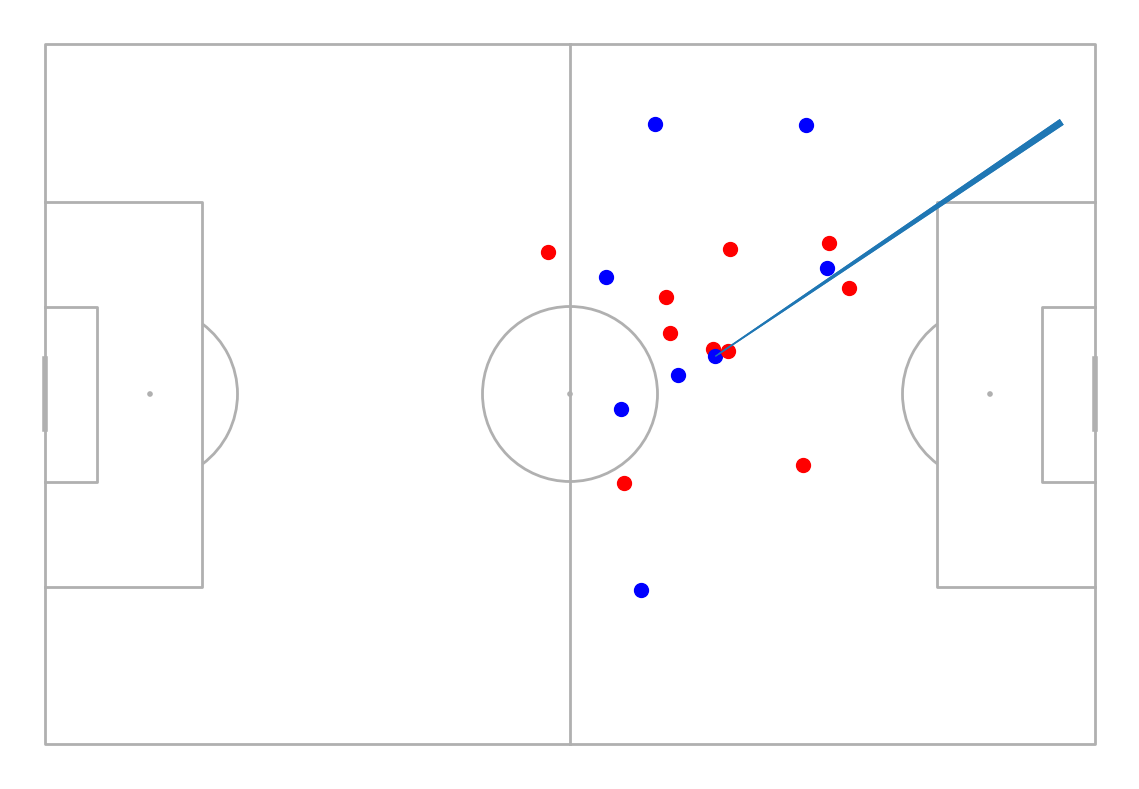

In [18]:
p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(12, 8))

## the single pass
df1 = df1.iloc[0:1]  # Corrected indexing syntax

p.scatter(x=df1['x_start'], y=df1['y_start'], ax=ax)
p.lines(xstart=df1['x_start'], xend=df1['x_end'], ystart=df1['y_start'], yend=df1['y_end'], ax=ax, comet=True)  # Corrected typo (xend==df['x_end'])

for x in df1.iloc[0]['freeze_frame']:
    if x['teammate']:
        color = 'blue'
    else:
        color = 'red'
        
    p.scatter(x=x['location'][0],y=x['location'][1],ax=ax,c=color,s=100)

### Finding Mbappes player_id

In [19]:
unique_players = df[['player', 'player_id']].drop_duplicates()
unique_players

,player,player_id
0,NaN,NaN
12,Antoine Griezmann,5487.0
13,Aurélien Djani Tchouaméni,10481.0
14,Nahuel Molina Lucero,29201.0
15,Rodrigo Javier De Paul,7797.0
16,Cristian Gabriel Romero,20572.0
17,Nicolás Hernán Otamendi,3090.0
20,Nicolás Alejandro Tagliafico,5507.0
27,Damián Emiliano Martínez,6909.0
28,Theo Bernard François Hernández,6704.0


In [20]:
MBAPPE = 3009.0

df1 = df[(df['player_id']==MBAPPE) & (df['shot_outcome']=='Goal')].reset_index(drop=True)
df1

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:34:24.975,Shot,NaN,6cc0d5e2-6999-4006-8a7a-34de4cbe3ffd,"[111.040679999615, 61.2180691486706, 94.960792...","[{'teammate': True, 'actor': False, 'keeper': ..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:35:59.025,Shot,NaN,03fb2918-e1e7-4ec8-89ff-7bc5531e853d,"[103.353210982717, 74.4449113428643, 80.176313...","[{'teammate': False, 'actor': False, 'keeper':..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:12:05.189,Shot,NaN,d9b92dbd-4fea-4f48-b2fb-d7222eab2dbd,"[110.856817541161, 61.2421309867409, 95.263925...","[{'teammate': False, 'actor': False, 'keeper':..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:00:13.386,Shot,NaN,NaN,NaN,NaN


### Analyzing the second goal socred (excluding all penalties )

In [21]:
df1.location.tolist()

[[108.0, 40.0], [104.8, 30.1], [108.0, 40.0], [108.1, 40.1]]

In [22]:
df1.shot_end_location.str[:2]

0    [120.0, 37.3]
1    [120.0, 41.5]
2    [120.0, 36.7]
3    [120.0, 37.6]
Name: shot_end_location, dtype: object

In [23]:
df1[['x_start','y_start']] = pd.DataFrame(df1.location.tolist(),index=df1.index)
df1[['x_end','y_end']] = pd.DataFrame(df1.shot_end_location.str[:2].tolist(),index=df1.index)
df1

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame,x_start,y_start,x_end,y_end
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:34:24.975,Shot,NaN,6cc0d5e2-6999-4006-8a7a-34de4cbe3ffd,"[111.040679999615, 61.2180691486706, 94.960792...","[{'teammate': True, 'actor': False, 'keeper': ...",108.0,40.0,120.0,37.3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:35:59.025,Shot,NaN,03fb2918-e1e7-4ec8-89ff-7bc5531e853d,"[103.353210982717, 74.4449113428643, 80.176313...","[{'teammate': False, 'actor': False, 'keeper':...",104.8,30.1,120.0,41.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:12:05.189,Shot,NaN,d9b92dbd-4fea-4f48-b2fb-d7222eab2dbd,"[110.856817541161, 61.2421309867409, 95.263925...","[{'teammate': False, 'actor': False, 'keeper':...",108.0,40.0,120.0,36.7
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:00:13.386,Shot,NaN,NaN,NaN,NaN,108.1,40.1,120.0,37.6


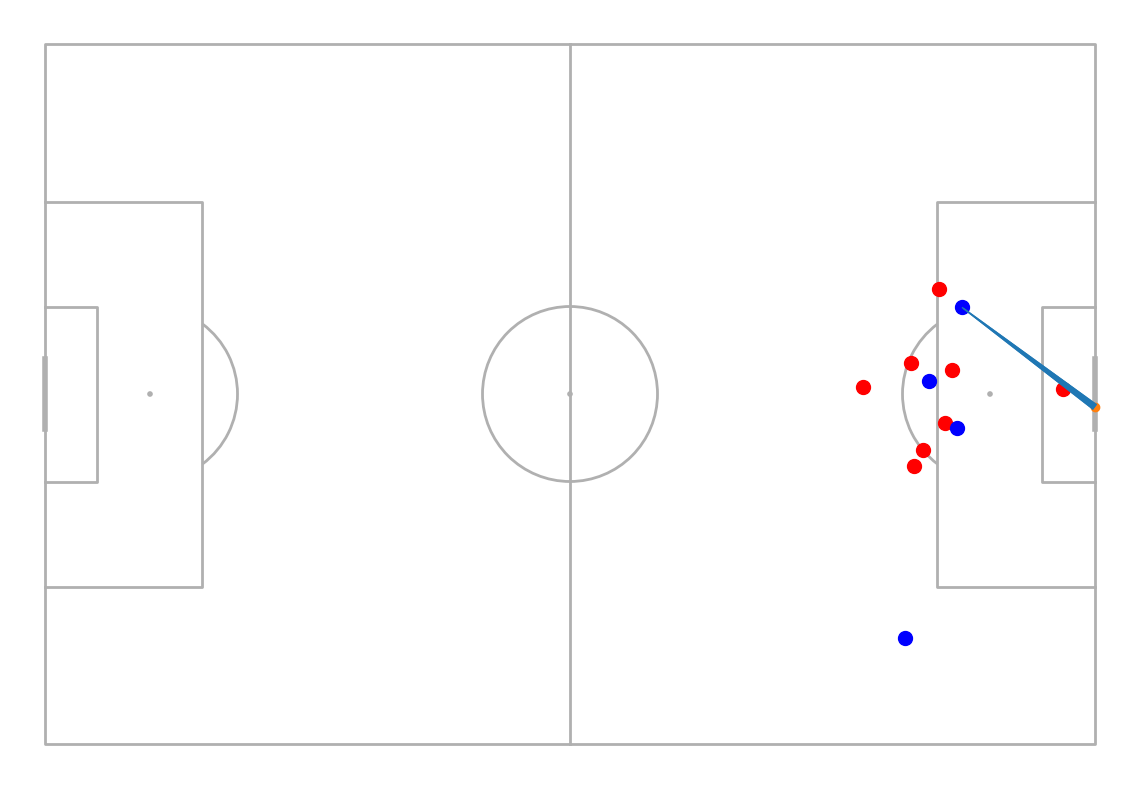

In [34]:
p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(12, 8))

## the single pass
df1_goal = df1.iloc[1]  
p.scatter(x=df1_goal['x_start'], y=df1_goal['y_start'], ax=ax)
p.scatter(x=df1_goal['x_end'], y=df1_goal['y_end'], ax=ax)

p.lines(xstart=df1_goal['x_start'], xend=df1_goal['x_end'], ystart=df1_goal['y_start'], yend=df1_goal['y_end'], ax=ax, comet=True)  # Corrected typo (xend==df['x_end'])


for x in df1_goal['freeze_frame']:
    if x['teammate']:
        color = 'blue'
    else:
        color = 'red'
        
    p.scatter(x=x['location'][0],y=x['location'][1],ax=ax,c=color,s=100)